# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to download data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

haberman.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


### Here,the main  objective of the analysis is to predict the survival status of patients   

### Features: age,year,lymph nodes
### Class Label: status

1 ==> means that a  patient survied 5 years or longer

2 ==> means that a  patient died within 5 years

In [72]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

### Observations:

-  It is evident that the number of patients who survived 5 years or longer are more than the number of patients who died within 5 years
- It is an imbalanced dataset

In [73]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

### Checking if features age and year are useful for preditctive analysis

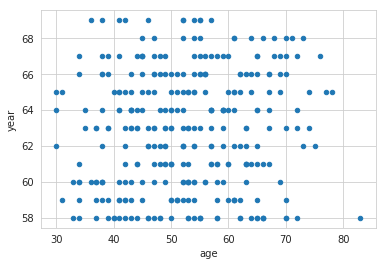

In [117]:
#2-D Scatter-Plot

haberman.plot(kind='scatter', x='age', y='year') ;

plt.show()

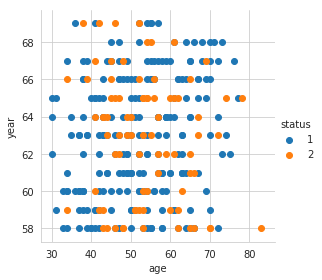

In [75]:
#2-D Scatter plot with color coding for each class

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();

### Observations:

- There seems to be some separability between the two features based on class labels
- However,no solid conclusion can be made due to a lot of overlapping


- From the above 2D scatter-plot it is difficult to distinguish between the two classes as there is a lot of overlapping between the two and there is no clear separability

## Seaborn Pairplot 

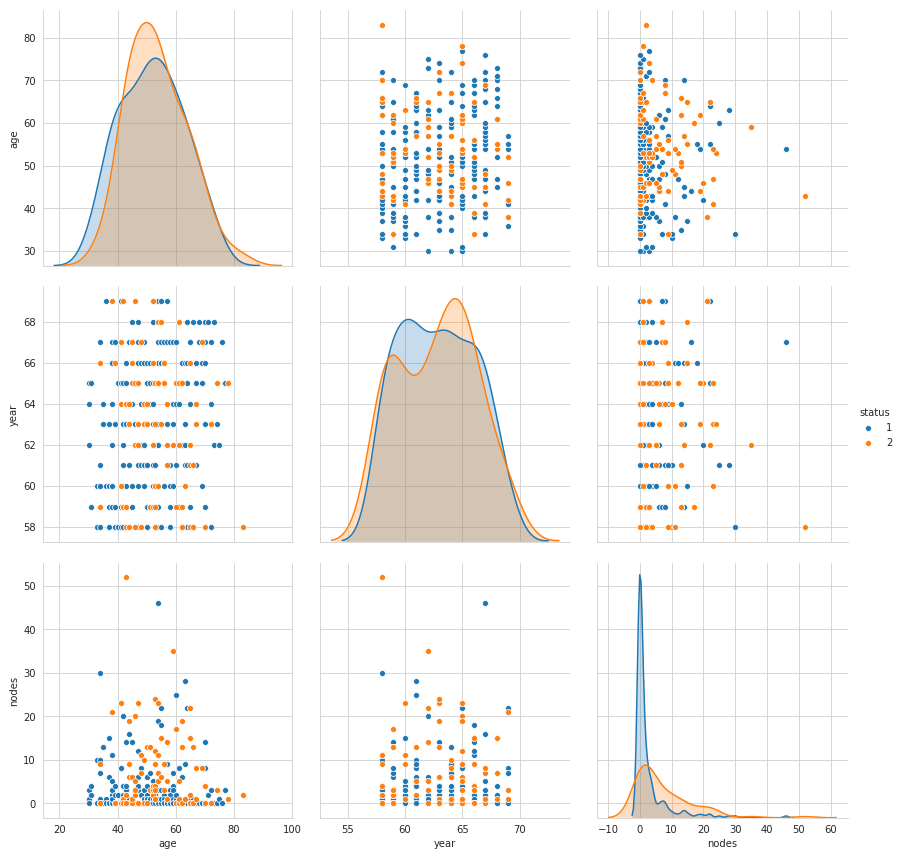

In [83]:
import warnings
warnings.filterwarnings("ignore") 
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue= "status", vars=["age", "year", "nodes"], size=4);
plt.show()

### Observations
- The distributions are overlapping
- There is minimal separability between the datapoints based on target variable 'status'
- Difficult to make solid conclusions

# Univariate Analysis

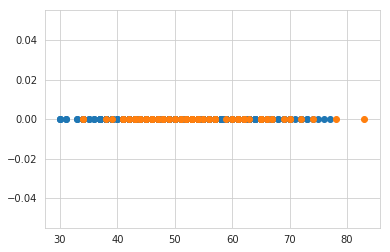

In [84]:
import numpy as np
survived=haberman.loc[haberman["status"] == 1]
died=haberman.loc[haberman["status"] == 2]
plt.plot(survived['age'],np.zeros_like(survived['age']),'o')
plt.plot(died['age'],np.zeros_like(died['age']),'o')
plt.show()

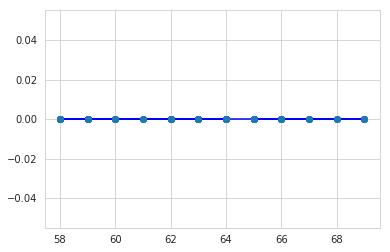

In [85]:
import numpy as np
survived=haberman.loc[haberman["status"] == 1]
died=haberman.loc[haberman["status"] == 2]
plt.plot(survived['year'],np.zeros_like(survived['age']),'b')
plt.plot(died['year'],np.zeros_like(died['age']),'o')
plt.show()

### Observations:

- There seems to be only one class that is visible on the graph. 
- So this feature cannot be used to a patient's survival status  based on year of operation

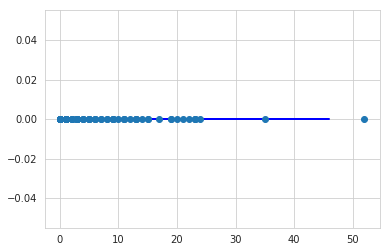

In [86]:
import numpy as np
survived=haberman.loc[haberman["status"] == 1]
died=haberman.loc[haberman["status"] == 2]
plt.plot(survived['nodes'],np.zeros_like(survived['age']),'b')
plt.plot(died['nodes'],np.zeros_like(died['age']),'o')
plt.show()

### Observations:
- If Number of positive auxillary nodes > 35: then the patient died
- But it is not a solid conclusion

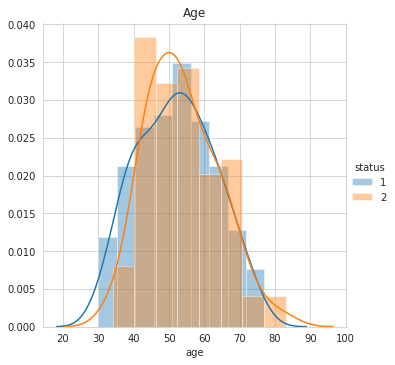

In [97]:
sns.FacetGrid(haberman,hue='status',size=5)\
   .map(sns.distplot,'age')\
   .add_legend()
plt.title("Age")
plt.show();

### Observations:

- The distributions of datapoints belonging to class 1 and class 2 are overlapping
- There is no separability between the two distributions 

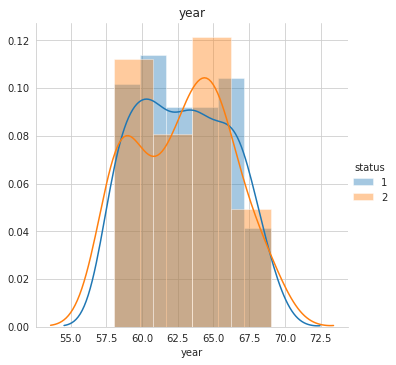

In [98]:
sns.FacetGrid(haberman,hue='status',size=5)\
   .map(sns.distplot,'year')\
   .add_legend()
plt.title('year')
plt.show();

### Observations:
- Year of operation has no correlation with survival status
- The distributions of datapoints belonging to class 1 and class 2 are overlapping

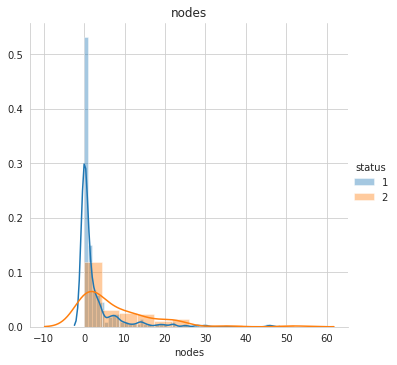

In [99]:
sns.FacetGrid(haberman,hue='status',size=5)\
   .map(sns.distplot,'nodes')\
   .add_legend()
plt.title('nodes')
plt.show();

### Observations: 
- Higer positive -auxilary-nodes does not gives guarantee for more survival 

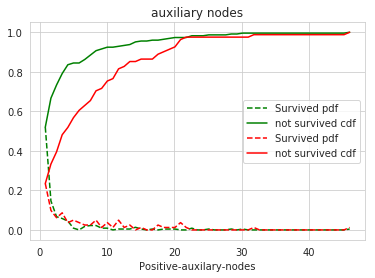

In [108]:


# now calculate the pdf & cdf for positive-auxilary nodes.

%matplotlib inline
# PDF & CDF
# compute pdf & cdf for survived

counts, bin_edges = np.histogram(survived['nodes'],bins = 55,density = True)
pdf = counts/sum(counts)
# print(pdf)
# print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,"--g",label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,"g",label = "not survived cdf")


# compute pdf & cdf for not_survived 

counts,bin_edgs = np.histogram(died['nodes'],bins= 55,density = True)
pdf = counts/sum(counts)
#print(pdf)
# print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'--r',label = "Survived pdf")
plt.plot(bin_edges[1:],cdf,'r',label = "not survived cdf")
plt.legend()
plt.xlabel("Positive-auxilary-nodes")
plt.title('auxiliary nodes')
plt.show()



In [107]:


survived_status = survived['nodes'].describe()
not_survived_status =died['nodes'].describe()

# create dataframe to store the survived_status and not_survived_status statistics.
df_nodes = pd.DataFrame(data={'Survived':survived_status,'Died':not_survived_status})


df_nodes



,Survived,Died
count,225.000000,81.000000
mean,2.791111,7.456790
std,5.870318,9.185654
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,4.000000
75%,3.000000,11.000000
max,46.000000,52.000000


### Observations:

- Most of patients have zero positive auxilary nodes

- Patients having zero nodes died early and patients having almost 1 survived more

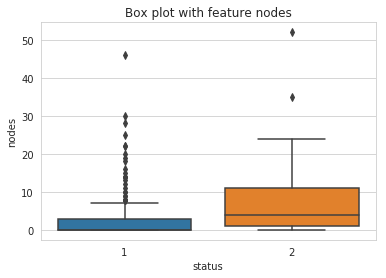

In [109]:
#Box-Plot

sns.boxplot(x='status',y='nodes', data=haberman)
plt.title('Box plot with feature nodes')
plt.show()

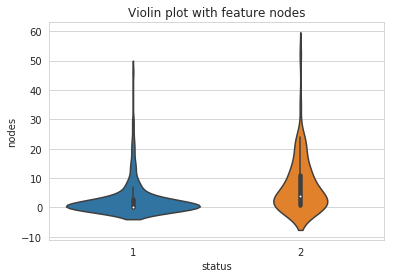

In [110]:
#Violin-plot
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title('Violin plot with feature nodes')
plt.show()

# Bi-Variate Analysis

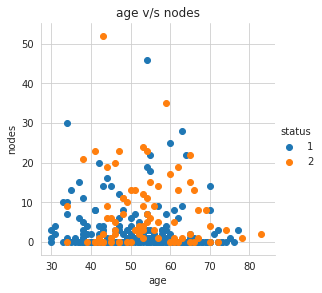

In [111]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='status',size=4).map(plt.scatter,'age','nodes').add_legend()
plt.title('age v/s nodes')
plt.show()

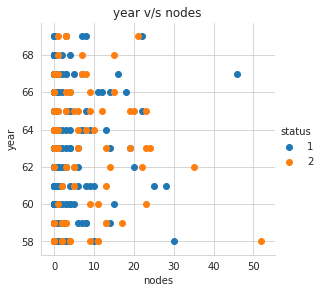

In [112]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='status',size=4).map(plt.scatter,'nodes','year').add_legend()
plt.title('year v/s nodes')
plt.show()

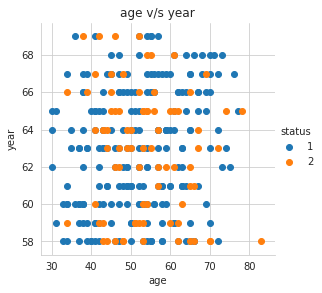

In [113]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='status',size=4).map(plt.scatter,'age','year').add_legend()
plt.title('age v/s year')
plt.show()


## Conclusions:

- Age does not affect  survival status.

- Year of operation does not have any affect on survival status

- Positve auxilary nodes has some affect on survival status

- If more number of Positve auxilary nodes are detected then patients died within 5 years

- If less number of Positve auxilary nodes are detected then patients survived for 5 years or more
